In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
time_steps = 200 # 总模拟时长

tau_s = 10
tau_r = 5
tau_m = 20
# 常数

V_th = 1.0
V_reset = 0.0
V_rest = 0.0

input_spike_times = [10, 100]
input_w = [0.8, 1.2]
# 输入脉冲

V = np.zeros(time_steps)
V_trace = []
spike_times = []

In [190]:
def eta(t_delta, tau_r):
    return -0.8 * np.exp(-t_delta/tau_r) if t_delta > 0 else 0
    # 抑制核函数 模拟神经元发放脉冲之后的超极化效应

def kappa(t_delta, tau_s):
    return np.exp(-t_delta/tau_s) if t_delta > 0 else 0
    # 兴奋核函数 模拟外部输入脉冲引起的突触后兴奋效应

In [191]:
for t in range(1, time_steps):
    
    input_effect, inhibition_effect, leak = 0, 0, 0

    for spike_time in spike_times:
        inhibition_effect += eta(t - spike_time, tau_r)
        # 累计自身脉冲对当前时刻的抑制作用
    
    for spike_time, weight in zip(input_spike_times, input_w):
        input_effect += weight * kappa(t - spike_time, tau_s)
        # 累计外部输入脉冲对当前时刻的影响
        
    leak = -(V[t - 1] - V_rest) / tau_m
    # 泄露计算
        
    V[t] = V[t - 1] + input_effect + inhibition_effect + leak
    if V[t] >= V_th:
        spike_times.append(t)
        V_trace.append(V[t])
        V[t] = V_reset
    else:
        V_trace.append(V[t])

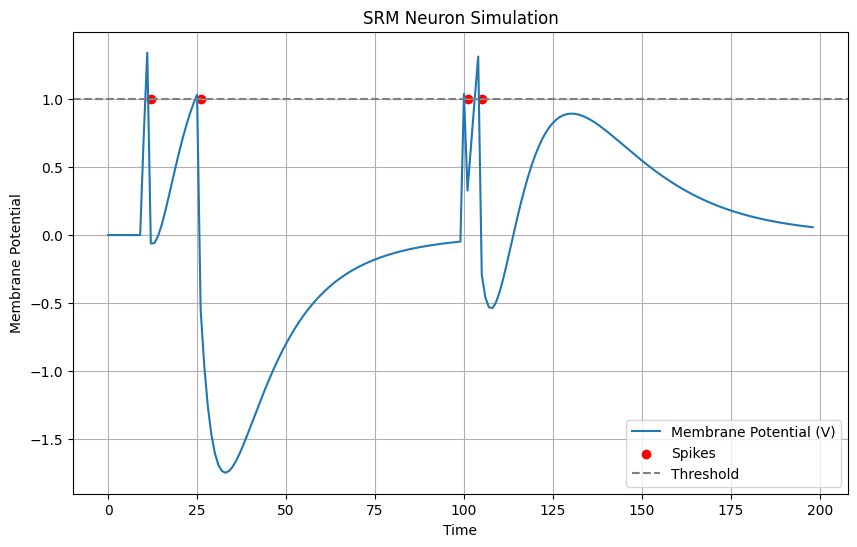

In [192]:
plt.figure(figsize=(10, 6))

plt.plot(V_trace, label="Membrane Potential (V)")
plt.scatter(spike_times, [V_th] * len(spike_times), color='red', label="Spikes")
plt.axhline(y=V_th, color='gray', linestyle='--', label="Threshold")
plt.title("SRM Neuron Simulation")
plt.xlabel("Time")
plt.ylabel("Membrane Potential")
plt.legend()
plt.grid()
plt.show()